# Churn Prediction and User Clustering

## Table of contents

1. [Introduction](#intro)
2. [General information](#gen)
    * [Conclusion](#concl1)
3. [EDA](#eda)
    * [Conclusion](#concl2)
4. [Data preprocessing](#preproc)
    * [Conclusion](#concl3)
5. [Churn prediction model](#churn)
    * [Conclusion](#concl4)
6. [User clustering](#cluster)
7. [Overall conclusion](#overall6)
    * [Advice for business](#advice)

<a id="intro"></a>
## Introduction

<b>Project description:</b>
<br>In this project we're going to analyze customer profiles from Model Fitness gym chain and come up with a customer retention strategy. For this purpose we will predict the probability of churn (for the upcoming month) for each customer, draw up typical user portraits by selecting the most outstanding groups and describing their main features and analyze the factors that impact churn the most.

<b>Project structure:</b>

1. General look at the data.
2. EDA and Data preprocessing
3. Modeling. Churn prediction and users' clustering.
4. Overall conclusion and advice for business.

<a id="gen"></a>
## General information

In [1]:
#!pip install -Uq seaborn
#!pip install -Uq sidetable

*! be sure to install updates, otherwise some blocks may not work*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [3]:
try:
    data = pd.read_csv('gym_churn_us.csv')
except:
    print('Error while loading the file')

In [4]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
data.tail()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

*Conclusion*: we have a realtively small dataset with 14 columns, and 4000 rows. There are only 2 types of variables: `int64` and `float64`. We don't see any missing values. There are uppercase letters in column names, so we'll turn them lowercase later, all `int64` types can also be changed to `int16`.

In [7]:
data.stb.missing(style=True)

,missing,total,percent
gender,0,"4,000",0.00%
Near_Location,0,"4,000",0.00%
Partner,0,"4,000",0.00%
Promo_friends,0,"4,000",0.00%
Phone,0,"4,000",0.00%
Contract_period,0,"4,000",0.00%
Group_visits,0,"4,000",0.00%
Age,0,"4,000",0.00%
Avg_additional_charges_total,0,"4,000",0.00%
Month_to_end_contract,0,"4,000",0.00%


Additionally, we want to quickly check that we don't have duplicate rows:

In [8]:
data.duplicated().sum()

0

<a id="concl1"></a>
### Conclusion

We have a relatively small dataset: 4000 rows and 14 columns, we found no missing data and no duplicated data. 

In this dataset we have only numerical variables: `int64` and `float64`, which could be turned to 8 and 16 bit versions, but as the dataset is very small, only 437kb, we can leave them as they are.  Additionally column names contain uppercase letters and for convinience we'll make them lowercase later.

<a id="eda"></a>
## EDA

At first, let's lowercase all column names.

In [9]:
data.columns = data.columns.str.lower()

In [10]:
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [11]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


*Conclusion*: 

<b>non-binary</b> 
* `contract_period` min and max look ok 
* `age` min and max look ok
* `avg_additional_charges_total` looks like may have outliers. Additionally in the description it says that this column has total amount of money spent, while the name suggests average. It looks more like a total, so while in this project we can't ask engineers what is true, we will change the name so that it corresponds to the description of the project.
* `month_to_end_contract` looks ok
* `lifetime` looks like may have outliers
* `avg_class_frequency_total` as it describes average number of visits per week 6 looks like an outlier, less than 2 is our mean, which doesn't look so good
* `avg_class_frequency_current_month` describes average number of visits per week over the preceding month and it's mean is even smaller.

<b>binary</b>'s mean gives us a good look at the percentage of 1 to 0, or True to False.
* `gender` is almost neatly devided for both genders: 51 to 49%
* `near_Location` says a lot: almost 85% of clients live near the gym
* `partner` tells us that almost half of our customers belong to a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
* `promo_friends` tells whether the user originally signed up through a "bring a friend" offer, and shows us that this offer brought 30% of customers.
* `phone` almost everyone gives a phone number to the gym.
* `group_visits` shows us that 41% of users take part in group sessions
* `churn` shows 26% of churn. It is our target variable and these proportions say that we have imbalanced data. But this range is not extreme, it is considered mild.

Next, we'll take a look at means for two groups by `churn` : for those who left and for those who stayed.

In [12]:
data.rename(columns={'avg_additional_charges_total' : 'additional_charges_total'}, inplace=True)

In [13]:
churn_grouped = data.groupby('churn').mean().reset_index()
churn_grouped

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


*Conclusion*:
* `gender`: we have same ratio both in those who left and those who stayed, looks like this feature doesn't influence our `churn` parameter, and isn't it good? 👫
* `near_location`: those who left have about 10% more people who live further from gyms, than in those who stayed. It sounds logical, maybe they found a gym nearby and preferred to stay there.
* `partner`: a quite significant difference, 53% of those who stayed are from partner companies in contrast to 35% of those who left. Being from partner company (and getting a discount) seams does have influence over the churn rate.
* `promo_friends`: another feature influencing the curn rate: 35% of those who stayed joined by friend invitation and there are only 18% of those who left. Usually it is more pleasant and motivating to go to gym with people you know.
* `phone`: looks to be unrelevant as it has same ratio in both groups.
* `contract_period`: another important feature, 5.7 on average for those who stayed, and 1.7 for those who left. Although it is hard to tell whether it influences the churn rate or vice versa, who knows, maybe they didn't plan to become regulars from the beginning.
* `group_visits`: has almost 20% difference: 46% for those who stayed and about 27% for those who left. While participating in group activities you're more likely to make new acquaintences and friends and hence get more attached to the gym.
* `age`: looks like those who leave are a bit younger than those who stay.
* `additional_charges_total`: this parameter may be influenced by outliers, for now it looks like those who leave spend less on average than those who stay.
* `month_to_end_contract`: those who leave usually leave by the end of their contract with 1.6 months left before they churn, while those who stay have 5 months on average till the end of the contract.
* `lifetime`: we see a major difference between the groups, on average customers leave after the first month, while those who stay have 4.7 months history in gym.
* `avg_class_frequency_total`: again, we have significant difference between two groups: those who stay visit gym twice a week on average, while those who leave visit only once to twice on average.
* `avg_class_frequency_current_month`: looks pretty close to the previous parameter, it may cause multicollinearity together with previous feature, we'll take a closer look at correlation matrix.

Let's take a look at histograms of features for `churn` parameter. 

In [14]:
listed_features = data.drop('churn', axis=1).columns
listed_features

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age', 'additional_charges_total',
       'month_to_end_contract', 'lifetime', 'avg_class_frequency_total',
       'avg_class_frequency_current_month'],
      dtype='object')

In [15]:
palette = sns.color_palette("Paired")[9:11]

In [16]:
def plot_feature_hist(name, df, target):
    plt.figure(figsize=(8, 8))
    
    sns.histplot(data=df, x=name, hue=target, palette=palette, kde=True)
    
    plt.title('Distribution of {} per {} parameter'.format(name, target))
    plt.show()

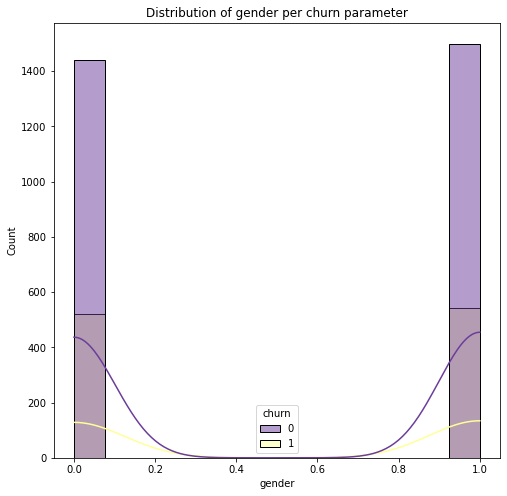

Mean for churn: 0.5108388312912346 | Mean for non-churn: 0.5100374276964954
Median for churn: 1.0 | Median for non-churn: 1.0


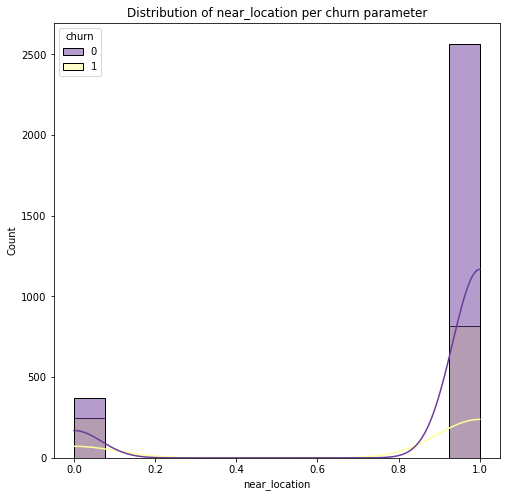

Mean for churn: 0.7681432610744581 | Mean for non-churn: 0.8730860837019394
Median for churn: 1.0 | Median for non-churn: 1.0


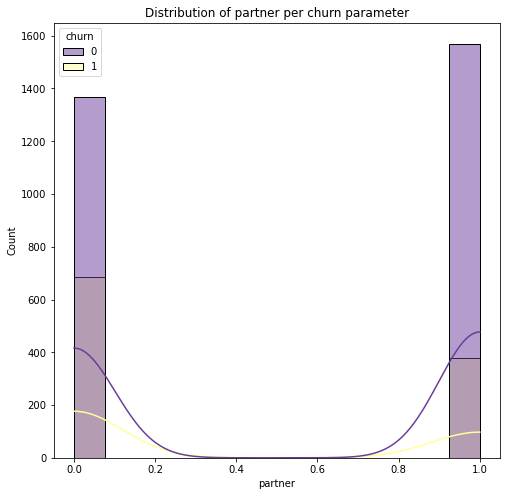

Mean for churn: 0.35532516493873706 | Mean for non-churn: 0.5341953045253488
Median for churn: 0.0 | Median for non-churn: 1.0


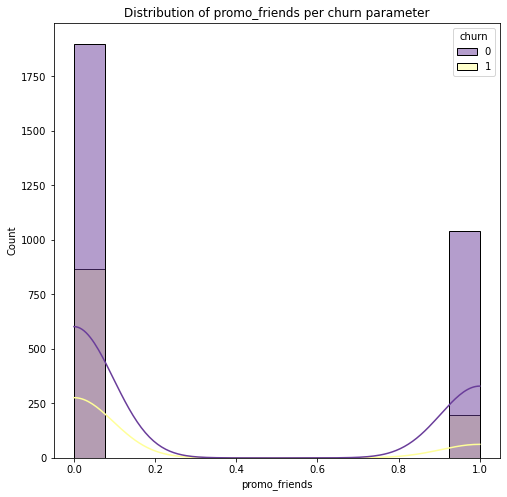

Mean for churn: 0.18378887841658811 | Mean for non-churn: 0.35352160598843146
Median for churn: 0.0 | Median for non-churn: 0.0


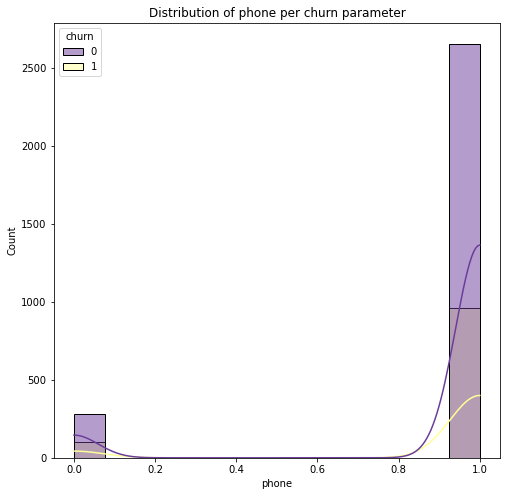

Mean for churn: 0.9029217719132894 | Mean for non-churn: 0.9037087444709084
Median for churn: 1.0 | Median for non-churn: 1.0


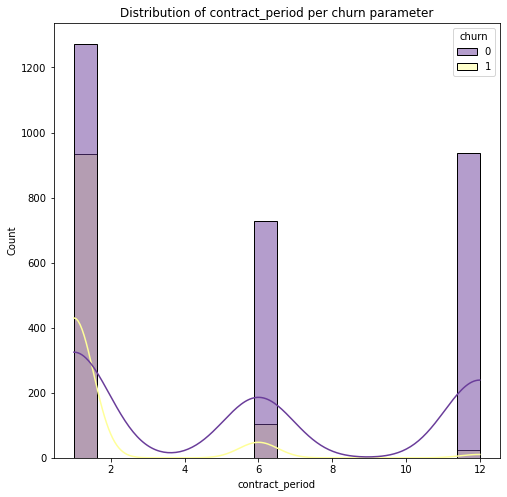

Mean for churn: 1.7285579641847313 | Mean for non-churn: 5.747192922762845
Median for churn: 1.0 | Median for non-churn: 6.0


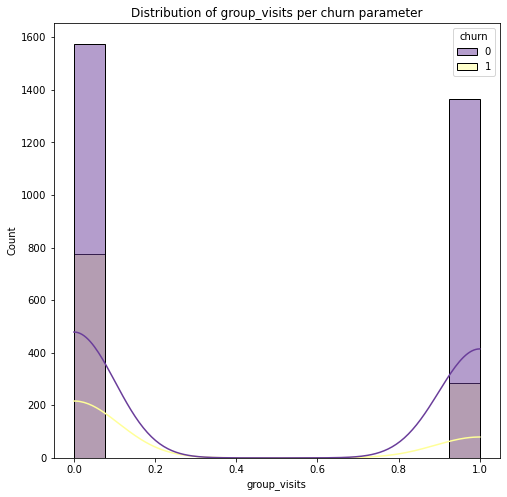

Mean for churn: 0.26861451460885954 | Mean for non-churn: 0.46410343654304187
Median for churn: 0.0 | Median for non-churn: 0.0


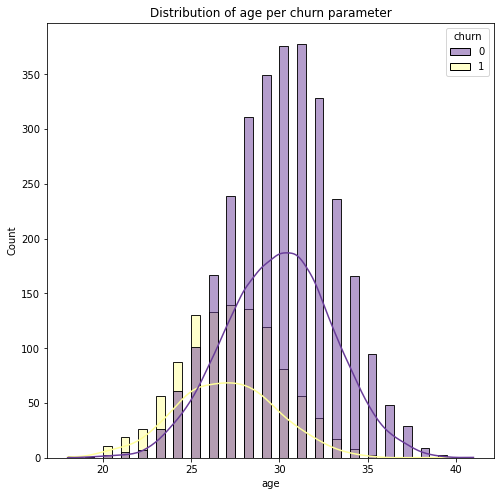

Mean for churn: 26.989632422243165 | Mean for non-churn: 29.97652262674379
Median for churn: 27.0 | Median for non-churn: 30.0


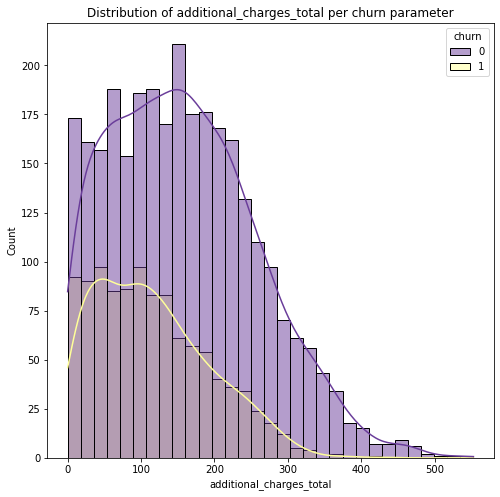

Mean for churn: 115.08289861928726 | Mean for non-churn: 158.4457148016119
Median for churn: 103.81468566076916 | Median for non-churn: 149.88117082862337


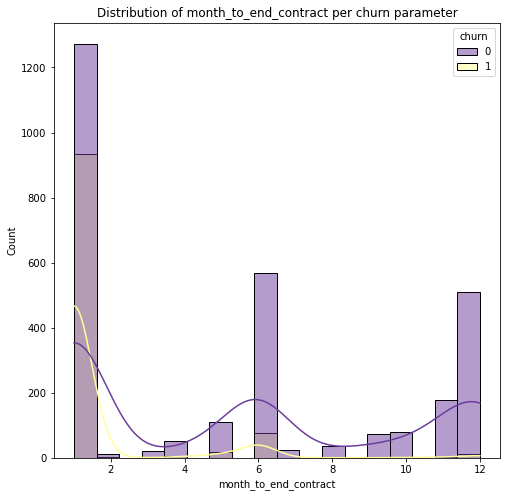

Mean for churn: 1.6625824693685203 | Mean for non-churn: 5.283089486219803
Median for churn: 1.0 | Median for non-churn: 6.0


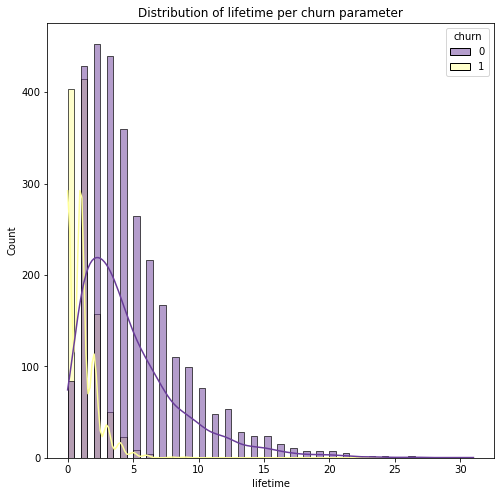

Mean for churn: 0.9905749293119699 | Mean for non-churn: 4.711806736985369
Median for churn: 1.0 | Median for non-churn: 4.0


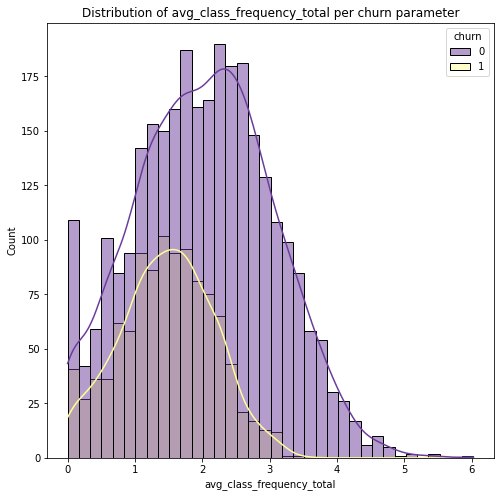

Mean for churn: 1.4749946623729768 | Mean for non-churn: 2.024875642518554
Median for churn: 1.491187497274369 | Median for non-churn: 2.043251663900741


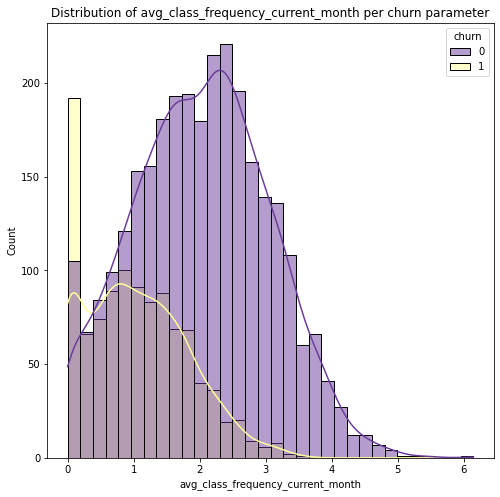

Mean for churn: 1.0445455933980166 | Mean for non-churn: 2.0278817330951795
Median for churn: 0.9794450922095258 | Median for non-churn: 2.04669681459107


In [17]:
for i in listed_features:
    plot_feature_hist(i, data, 'churn')
    print('Mean for churn: {} | Mean for non-churn: {}'.format(
        data.query('churn == 1')[i].mean(), data.query('churn == 0')[i].mean())
         )
    print('Median for churn: {} | Median for non-churn: {}'.format(
        data.query('churn == 1')[i].median(), data.query('churn == 0')[i].median())
         )

*Conclusion*:
* `gender`, `near_location`, `promo_friends` and `phone` have very similar distributions both for churn and non-churn. Although in `promo_friends`'s mean we see that there's difference. 
* `partner` shows difference in mean and median values for churn and non-churn, making it clear that majority of churn don't come from partner companies.
* `contract_period`: a numerical categorical variable. For this type of a variable median is a better measure of central tendency, mode would have been a good choice too, but for automation purposes we'll leave median. We can see that the longer contract clients have the lesser chance they will leave: half of clients that leaves have 1-month contract, and the smallest portion has 12-months contract, while half of clients that stay has 6 months contract. 

* `age`: we can see that the data follows normal distribution, as well as is distributed differently for churn and non-churn. Non-churn clients have data distributed around higher mean than churn clients, and as we've seen in `describe` method it is around 30 years, while churn - around 27. We can say that generally a younger generation finds it easier to leave gym. 

* `additional_charges_total`: is right-skewed, mean and median for both groups are are different, meaning that there are some outliers, so we will take median for analysis. Churn and non-churn follow similar distribution pattern, half of the clients spend less than 105 per month for churn and less than 150 for non-churn. Here we see a clear difference: non-churn spend more on average than churn.

* `month_to_end_contract`: another categorical numerical variable, so we're looking at median. The picture looks almost the same as with `contract_period` variable, they may be highly correlated. Same for medians: 1 for churn and 6 for non-churn.

* `lifetime`: looks like non-churn is more influenced by outliers than churn, but not to the extreme extent. For churn half of clients have one month lifetime, and non-churn - 4.

* `avg_class_frequency_total`: right-skewed data, still we see that means and medians are pretty close. For churn on average they frequent the gym less than non-churn by 0.5.

* `avg_class_frequency_current_month`: looks very similar to previous variable except for number of 0 visits which is enourmously high. We will take additional look at these rows as it will be suspicious if we'll have 0 visits both in current month and in total for non-churn.

In [18]:
data[data['avg_class_frequency_current_month'] == 0]

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.0,0
13,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.000000,0.0,1
21,0,0,0,0,1,1,0,30,153.198594,1.0,3,0.636382,0.0,1
31,0,1,0,0,1,12,1,32,87.856139,12.0,1,0.000000,0.0,0
46,1,1,0,0,1,1,0,26,54.184236,1.0,0,0.854079,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,1,0,1,0,1,1,0,27,8.000714,1.0,0,0.104019,0.0,1
3966,1,1,0,0,1,1,0,30,86.987803,1.0,0,0.220706,0.0,1
3971,1,1,0,0,1,1,0,27,60.636243,1.0,0,0.755127,0.0,1
3977,1,1,0,0,1,1,0,29,93.817092,1.0,0,0.444837,0.0,1


In [19]:
data[(data['avg_class_frequency_current_month'] == 0) & (data['avg_class_frequency_total'] == 0)]

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
13,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.0,0.0,1
31,0,1,0,0,1,12,1,32,87.856139,12.0,1,0.0,0.0,0
59,1,1,1,1,1,1,0,34,166.862754,1.0,10,0.0,0.0,0
62,0,1,1,1,0,6,0,34,72.641112,6.0,2,0.0,0.0,0
128,1,0,1,0,1,6,0,29,291.731275,5.0,0,0.0,0.0,1
166,0,1,0,0,1,6,0,29,143.135489,5.0,4,0.0,0.0,0
224,1,1,1,0,1,1,1,34,190.750507,1.0,1,0.0,0.0,0
355,0,1,1,1,1,1,1,30,83.809056,1.0,9,0.0,0.0,0
385,1,1,0,1,1,1,0,33,209.542824,1.0,17,0.0,0.0,0
427,1,1,0,0,1,1,0,33,209.988954,1.0,3,0.0,0.0,0


In [20]:
data[(data['avg_class_frequency_current_month'] == 0) & (data['avg_class_frequency_total'] == 0)]['churn'].value_counts()

0    41
1    18
Name: churn, dtype: int64

In [21]:
len(data[(data['avg_class_frequency_current_month'] == 0) & (data['avg_class_frequency_total'] == 0)]['churn']) / len(data)

0.01475

*Conclusion*: these rows look very suspicious, most likely there's missing data about gym visits. We see that these people are both churn and non-churn, non-churn even in greater numbers than churn, they spend money in the gym, lifetime varies from 1 to 27 months, both partner firms employees and not (could have been payed by company but not used contract). Also there are both clients that take group classes and not. So those are pretty active clients, but for some reason they have 0 visits both on average during whole lifetime and for the last month. 

For 0 visits in `avg_class_frequency_total` while there's greater than 0 value in `avg_class_frequency_current_month` can be explanation that this is a new client in question, or the one that came back after long break, so their lifetime avg wasn't updated yet. But for 0 in both it's too suspicious.

We have only 59 rows, which 1% of the data, with 0 in both, so we will remove them in Data Preprocessing step.

Let's take a look at correlation matrix.

In [22]:
cor_table = data.corr()
cor_table

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


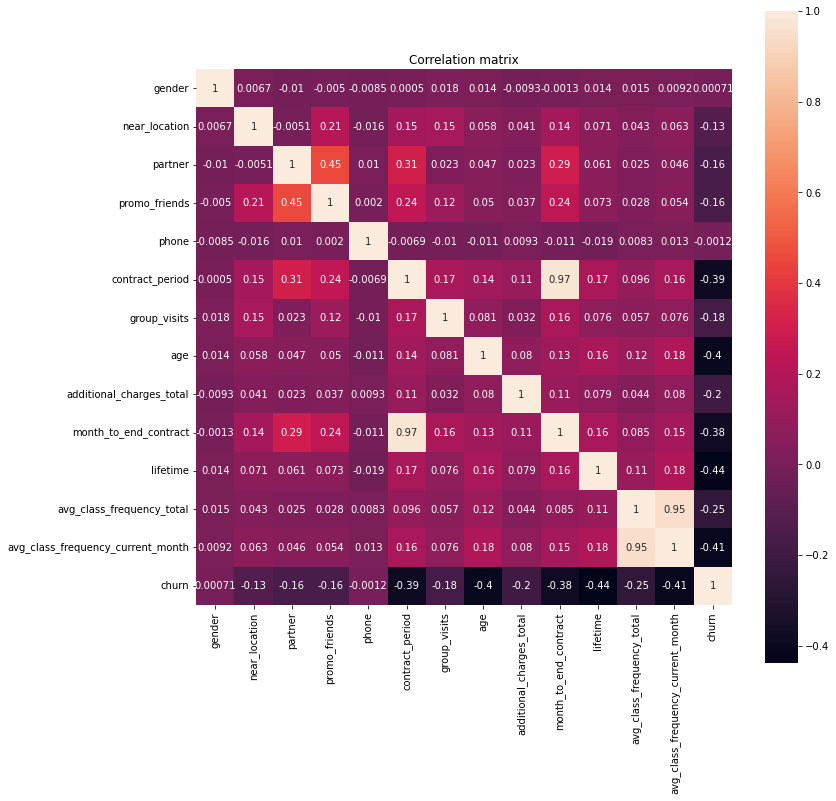

In [23]:
plt.figure(figsize=(12, 12))

sns.heatmap(cor_table, square=True, annot=True)

plt.title('Correlation matrix')
plt.show()

*Conclusion*: looking at correlation matrix we can spot several highly correlated features. 

1. As we've predicted earlier `avg_class_frequency_total` and `avg_class_frequency_current_month` are highly correlated.

2. Same goes for `month_to_end_contract` and `contract_period`.

3. As we've noticed earlier, `gender` has no correlation with `churn`, same with `phone`.

The features we can highlight in relation to churn are: `avg_class_frequency_current_month`, `lifetime`, `contract_period` and `month_to_end_contract`, `age` - all of them are negatively correlated, the smaller the value in these features, the closer to 0 `churn` is.

To confirm our findings about multicollinearity, we're going to use the <b>Variance-Inflation-factor</b> technique. The variables with >10 factor means that they are strongly correlated and should be excluded.

In [24]:
vif_scores = pd.DataFrame()

In [25]:
vif_scores['attribute'] = data.columns

In [26]:
vif_scores['VIF_scores'] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]

In [27]:
vif_scores

,attribute,VIF_scores
0,gender,2.033945
1,near_location,6.843544
2,partner,2.628084
3,promo_friends,1.958563
4,phone,9.555737
5,contract_period,39.547587
6,group_visits,1.817803
7,age,21.903903
8,additional_charges_total,3.404374
9,month_to_end_contract,38.953600


We've confirmed that `contract_period`, `month_to_end_contract` and `avg_class_frequency_total`, `avg_class_frequency_current_month` are highly correlated pairs. Additionally turns out that `age` also has high VIF score, though it doesn't have a pair. `Age` is an important feature for customer segmentation, so albeit risky, we will leave it.

<a i="concl2"></a>
### Conclusion

After thoroughly investigating data using EDA we've come closer to understanding the data and found additional steps we'd need to take in the preprocessing step.

*For data preprocessing*:
1. There are only 59 rows with 0 average visits both during lifetime and in the preceeding month, we will drop these rows as it is only 1% of the data.
2. We will form a dataset with chosen features, meaning:
    * we have to drop one from the highly correlated pairs to avoid multicollinearity (Decision trees as well as Random Rorest classifiers are not sensitive to collinearity, but logistic regression model is); 
    * additionally we will leave out columns that do not correlate with churn at all and won't have influence on the results: like `phone` and `gender`.

*Notes for modeling*:
 - Our data has binary as well as non-binary features, also non-binary features have Gaussian and non-Gaussian distributions. As we are going to create several models, including Gradient-Descent based logistic regression and  K-means later for clustering, we need to scale our data. For scaling we can use standardization. 
 - We have imbalanced data, meaning our target variable has skewed proportions. In our case it's 26 to 74%, which is considered mildly imbalanced. It can be treated like normal data, but probably `Accuracy` isn't the best metrics in these circumstances. 

<a id="preproc"></a>
## Data preprocessing

Now we'll remove 59 suspicious rows.

In [28]:
data_new = data.query('avg_class_frequency_current_month != 0 or avg_class_frequency_total != 0')

...and remove highly correlated features to avoid multicollinearity, and non-correlated features too.

In [29]:
data_new = data_new.drop({'avg_class_frequency_total', 'month_to_end_contract', 'phone', 'gender'}, axis=1)

In [30]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3941 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   near_location                      3941 non-null   int64  
 1   partner                            3941 non-null   int64  
 2   promo_friends                      3941 non-null   int64  
 3   contract_period                    3941 non-null   int64  
 4   group_visits                       3941 non-null   int64  
 5   age                                3941 non-null   int64  
 6   additional_charges_total           3941 non-null   float64
 7   lifetime                           3941 non-null   int64  
 8   avg_class_frequency_current_month  3941 non-null   float64
 9   churn                              3941 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 338.7 KB


Let's check once again that <b>VIF</b> score is now ok.

In [31]:
vif_scores_new = pd.DataFrame()

In [32]:
vif_scores_new['attribute'] = data_new.columns

In [33]:
vif_scores_new['VIF scores'] = [variance_inflation_factor(data_new.values, i) for i in range(len(data_new.columns))]

In [34]:
vif_scores_new

,attribute,VIF scores
0,near_location,6.834821
1,partner,2.627996
2,promo_friends,1.961704
3,contract_period,2.685624
4,group_visits,1.814675
5,age,15.365617
6,additional_charges_total,3.399993
7,lifetime,2.424484
8,avg_class_frequency_current_month,4.692455
9,churn,1.860386


For `age` it isn't perfect, but is already smaller. Probably age is correlated with several other features.

<a id="concl3"></a>
### Conclusion

In this part we've checked that we don't have duplicates and prepared a new dataset for modeling:
we've removed features that could cause collinearity for some of our models, and we've removed non-correlated with `churn` variables.

<a id="churn"></a>
## Churn prediction model

In this part we're going to train and then choose one of two models: Logistic Regression model and Random Forest Classifier model. 

First we'll devide our data into train and validation sets using the `train_test_split()` function.

In [35]:
# dividing the data into features (the X matrix) and a target variable (y)
X = data_new.drop('churn', axis=1)
y = data_new['churn']

In [36]:
# dividing the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

We'll create a function for printing out several metrics that we'll use for both models.

In [37]:
def print_all_metrics(y_true, y_pred, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

Next our models need normalization.

In [38]:
# training StandardScaler on the train set
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [39]:
# transforming train and test sets
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Now we can create and train our models.

In [40]:
#creating Logistic Regression model
lr_model = LogisticRegression(random_state=0)

In [41]:
lr_model.fit(X_train_st, y_train)

LogisticRegression(random_state=0)

In [42]:
lr_predictions = lr_model.predict(X_test_st)

In [43]:
print_all_metrics(y_test, lr_predictions)

Classification metrics
	Accuracy: 0.91
	Precision: 0.81
	Recall: 0.83


In [44]:
#creating Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

In [45]:
# training the random forest model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [46]:
# using the trained model to make predictions
rf_predictions = rf_model.predict(X_test)

In [47]:
print_all_metrics(y_test, rf_predictions)

Classification metrics
	Accuracy: 0.91
	Precision: 0.83
	Recall: 0.77


<a id="concl4"></a>
### Conclusion

Between the two models, we have same accuracy level, and considerable difference in Precision and in Recall. Our main purpose is to fight Churn, so Recall is more valuable than Precision, as it is better to falsly predict that the client will leave and take measures to hold them, than to miss a client that could have been prevented from leaving. Hense, logistic regression model is more fitted for the role.

<a id="cluster"></a>
## User clustering

To learn the number of clusters for K-means we're going to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. For this purpose we need our whole dataset (without target variable) to be standardized. 

This will be our first step.

In [48]:
sc = StandardScaler()

In [49]:
X_sc = sc.fit_transform(data_new)

In [50]:
linked = linkage(X_sc, method = 'ward')

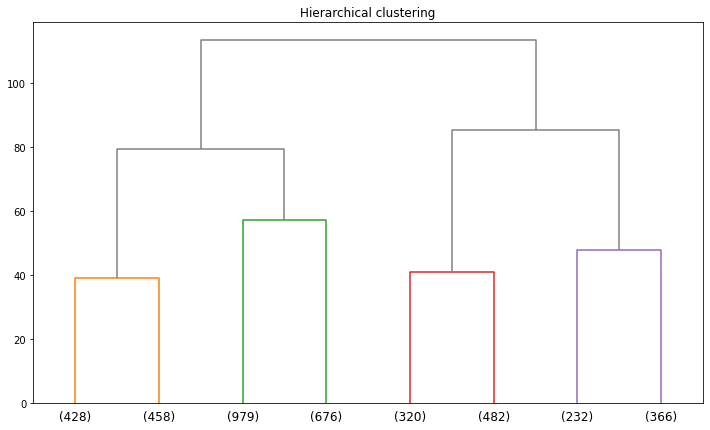

In [51]:
plt.figure(figsize=(12, 7))  
dendrogram(linked, orientation='top', above_threshold_color='grey', truncate_mode = 'level', p=2)
plt.title('Hierarchical clustering')
plt.show() 

We can see 4 supposed clusters. In the course of this project we will use 5 clusters for our K-means model.

In [52]:
km = KMeans(n_clusters = 5, random_state=0)

In [53]:
labels = km.fit_predict(X_sc)

In [54]:
data_new['cluster_km'] = labels

In [55]:
data_new.groupby('cluster_km').mean()

,near_location,partner,promo_friends,contract_period,group_visits,age,additional_charges_total,lifetime,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,
0,0.998875,0.343082,0.060742,4.681665,0.000000,29.911136,162.691005,4.834646,2.067948,0.000000
1,1.000000,0.335006,0.218319,1.749059,0.296110,26.932246,114.737327,0.964868,1.069874,0.996236
2,0.992045,0.959091,1.000000,7.931818,0.539773,29.927273,158.519547,4.705682,2.042587,0.006818
3,0.996139,0.272844,0.083655,5.359073,1.000000,30.223938,156.602346,4.756757,2.075897,0.002574
4,0.000000,0.486622,0.071906,2.933110,0.232441,28.687291,136.584624,2.991639,1.616495,0.403010


*Conclusion*: Analyzing these 5 clusters we'll form conclusions on similarities and differences between them starting from describing the cluster with highest `churn`:

1. <b>Highest churn</b>(0.99 - 3d cluster)
    * has lowest frequency in class for the last month - 1
    * has lowest lifetime - 10.9 months
    * has lowest total of additional spendings
    * has lowest average age - 27
    * has lowest contract period - 1.7 months
    * has highest chance of living near the gym - 1
This cluster stands out on it's own and is unlike every other.

2. <b>Lowest churn</b>(0 - 2nd cluster, 0.002 - 0 cluster, united to show traits in common):
    * have highest frequency in class for the last month
    * have highest lifetime - 4.7 and 4.8 months
    * have highest total of additional spendings - from 156.6 to 162.7
    * have highest age with average 29-30
Differences:
    * `group_visits` have values of 0 and 1, totally opposite values, which makes us believe it isn't influencing `churn`.

3. Among other clusters we saw that the second highest churn - 0.4, 1st cluster, has:
    * 0 value in `near_location` in contrast with 1st cluster, which makes us believe that this feature doesn't influence `churn`
    * second highest value in `partner` feature
    * second lowest `contract_period`
    * second lowest `age`
    * second lowest spendings
    * second lowest class frequency
    
4. 4th cluster with 0.006 churn is mostly average, but has it's highlights:
    * biggest value in `contract_period`
    * biggest value in `promo_friends`
    * biggest value in `partner`
    * has pretty similar values in `lifetime` and `additional_charges` to clusters with lowest `churn`.

Let's take a look at scatterplot matrix to evaluate correlation between these features and `churn`.

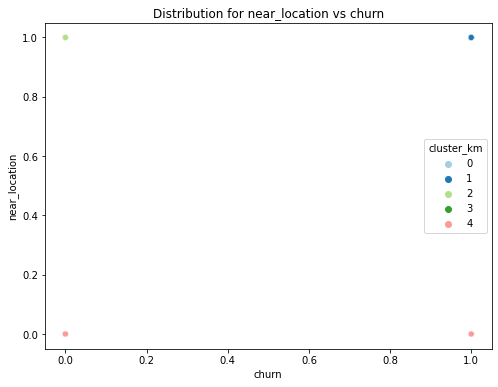

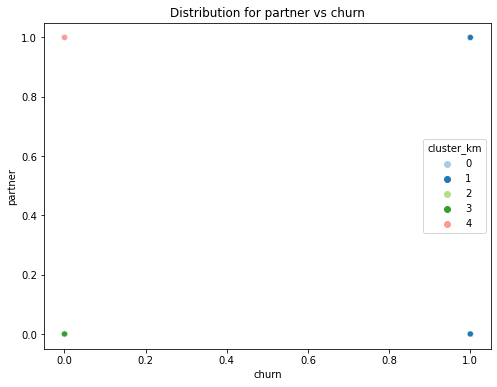

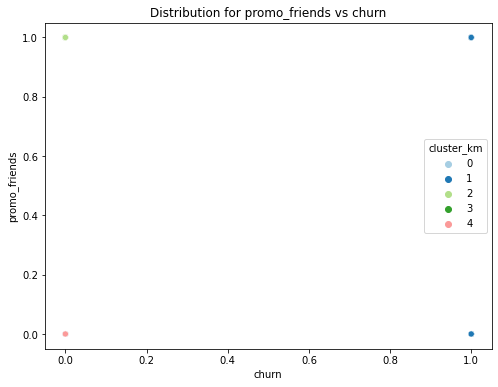

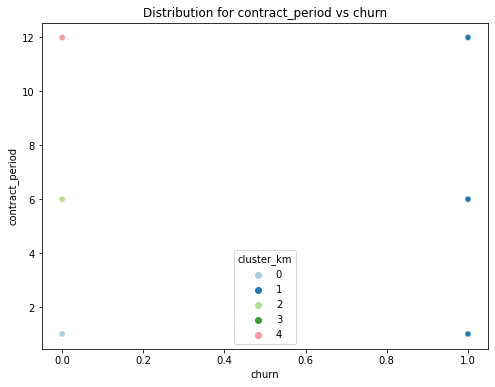

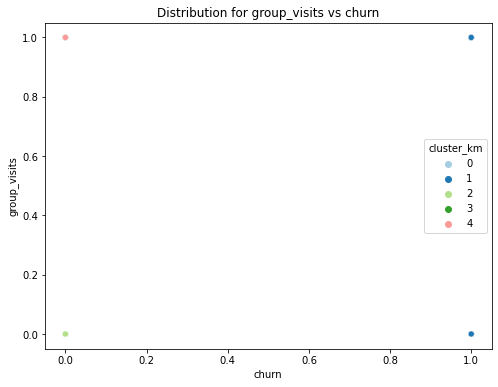

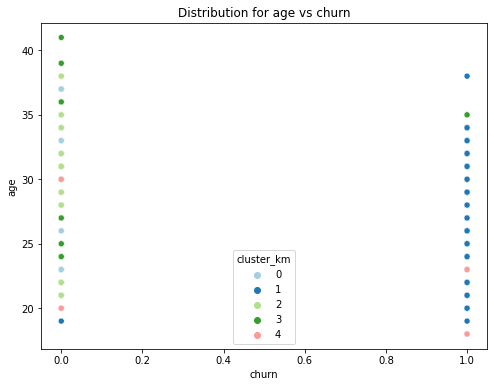

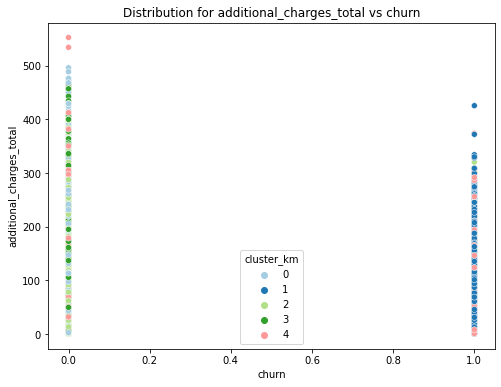

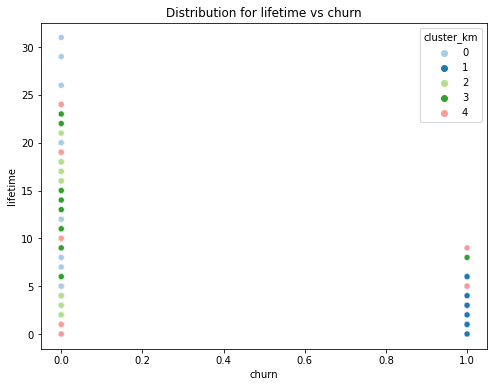

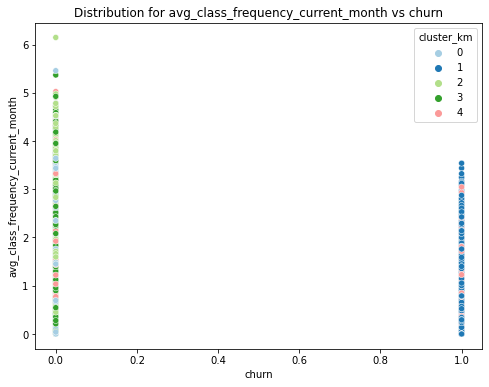

In [56]:
for i in data_new.drop({'churn', 'cluster_km'}, axis=1).columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data_new, x="churn", y=i, hue='cluster_km',
    palette="Paired")
    
    plt.title('Distribution for {} vs churn'.format(i))
    
    plt.show()

*Conclusion*:
Among all features we can highlight:
* `age` has negative correlation with churn, the older they are, the lower is churn. 
* `additional_charges_total` also has negative correlation, the more they spend the more likely they will not churn. 
* `lifetime` also confirms our hypothesis from analyzing averages: we see distinctive negative correlation: the newer they are to the gym, more likely they are to churn.
* `avg_class_frequency` same negative correlation, 0 and 3d clusters are the ones having highest frequency, while 2nd and 1st are with the lowest.

<a id="overall"></a>
## Overall conclusion

In this project we've conducted research over customer database for Model Fitness gym chain with a goal to fight churn. To achieve that goal we've used EDA and several machine learning techniques.

In the first part of our analysis, EDA, we've checked the data on possible issues and solved them:
* there was colliniarity problem between `contract_period` & `month_to_end_contract` and `avg_class_frequency_total` & `avg_class_frequency_current_month`, which we first saw on correlation matrix heatmap, and then confirmed using VIF technique. We've removed `month_to_end_contract` and `avg_class_frequency_total` as they have had lower correlation with target variable.
* `phone` and `gender` are not correlated with `churn` at all, so we didn't use these variables for the analysis.
* we've found 59 suspicious rows with 0 visits for the lifetime and for the current month, it is 1% of data, so we decided to remove them.
* we also checked distributions of all parameters to learn our data better.
* we've discovered that we have imbalanced data, but it is mildly imbalanced, so it shouldn't have affected the model's performance.

In the second part of the analysis we've built 2 forecasting models to be able to predict for each user their churn rate by the current month's data.
* we've standardized the data
* we've created Logistic Regression model and Random Forest Classifier model
* out of the 2 Logistic Regression showed better performance

In last part of analysis we've used customer segmentation with help of dendrogram and k-means clustering model. While dendrogram has found us 4 distinctive clusters, we've tried to create 5 clusters using k-means.

Analyzing common and different traits of customer segments, we've come to the next conclusions:

1. There are 5 main parameters that influence `churn` in our data. They are: `contract_period`, `age`, `additional_charges_total`, `lifetime` and `avg_class_frequency_current_month`. All of these features have negative correlation with `churn`, which means the bigger the value in the feature, the smaller a chance to churn.

2. Customer segment with lowest `churn` frequents the gym the most, has longest lifetime, has biggest additional charges for extra-services, cafe etc (although this factor can be influenced by time spent in gym), is 29-30 yo. 

3. Gender, phone (whether a customer left their phone number or not), being from partner-firm, location of the gym and promotion Friends have no influence over `churn`.

    It is logical to think that majority of people go to the gym they live nearby, so this is not a factor that'd have correlation with `churn` and we saw that in our analysis. Promotion Friends also does not actually mean it was real friend's promotion, if this promotion gives discount it can be any kind of acquaintence, so attachments won't help to prevent churn. 

    Although feature `phone` does not correlate with `churn`, we can use the fact that absolute majority has left their phone numbers in promotional strategies (if they agreed to receive promotional messages).

    It is good to know that we have gender equality in `churn`, meaning we don't have ethical issues to solve.

4. The cluster that could be used as a target customer segment which has very high churn rate that needs to be fixed is the opposite of the segments with lowest churn: it is a youngest group of customers with average age 27 yo, has lowest lifetime and shortest contracts, with lowest additional total spendings. This cluster has 0.99 churn rate.

*Materials used in the analysis*: 
1. https://medium.com/analytics-vidhya/a-practical-guide-to-logistic-regression-in-python-for-beginners-f04cf6b63d33
2. https://www.analyticsvidhya.com/blog/2021/09/guide-for-building-an-end-to-end-logistic-regression-model/
3. https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data
4. https://machinelearningmastery.com/what-is-imbalanced-classification/ 

<a id="advice"></a>
### Advice for business

1. We've trained a model to predict the probability of churn (for the upcoming month) for each customer, it is logistic regression model, and we advice to use it.

2. Among customers that the model will find most likely to churn we should hold first priority over customers who are:  
    * around 27yo and younger
    * are new to the gym or new customers
    * signed shortest contracts
    * has lowest frequency in the class.

As this is the segment with highest churn that needs to be reduced. For comparison, the segment with opposite characteristics (29-30yo on average, old customers with long-term contracts for at least 5 months, came twice a week over the last month) have lowest churn rate.

3. Marketing department should think of a strategy to make younger customers sign contracts for a longer period (a discount with Friend promo isn't effective against churn), as well as how to make them come to the gym at least twice a week. Perhaps, individual fitness programms, or awarding system like in games could help. Customers that spend more money in gym on additional services have also smaller churn rate, meaning that having more options for out-of-gym activities suitable for this age category could help. 